<div style="text-align:center; font-size:29px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Lista 4
</div>

**zadanie 3**

In [113]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

In [114]:
#empiryczna autokowariancja
def empACVF(X, h):
    n = len(X)
    x_mean = np.mean(X)
    return 1/n*sum((X[i]-x_mean)*(X[i+abs(h)]-x_mean) for i in range(1,n-abs(h)))

In [115]:
#empiryczna autokorelacja 
def empACF(X, h):
    return empACVF(X, h)/empACVF(X, 0)

In [116]:
def teoACVF(h):
    return 4 if h==0 else 0

def teoACF(h):
    return 1 if h==0 else 0

In [117]:
def dane3(n,h):
    X = np.random.normal(0, 2, size = n)
    return n,h,empACVF(X, h), empACF(X, h)

In [118]:
results = []
for h in list(range(-50,51)):
    n = 1000
    n, h, acvf, acf = dane3(n, h)
    results.append([n, h, acvf, teoACVF(h), acf, teoACF(h)])
        
df = pd.DataFrame(results, columns = ['n', 'h', 'empACVF', 'teoACVF', 'empACF', 'teoACF'])
df

,n,h,empACVF,teoACVF,empACF,teoACF
0,1000,-50,0.165800,0,0.041623,0
1,1000,-49,-0.179070,0,-0.046718,0
2,1000,-48,0.118996,0,0.030036,0
3,1000,-47,-0.001075,0,-0.000261,0
4,1000,-46,0.263439,0,0.060807,0
...,...,...,...,...,...,...
96,1000,46,-0.259422,0,-0.063374,0
97,1000,47,-0.035317,0,-0.008471,0
98,1000,48,-0.269906,0,-0.065792,0
99,1000,49,0.224806,0,0.056036,0


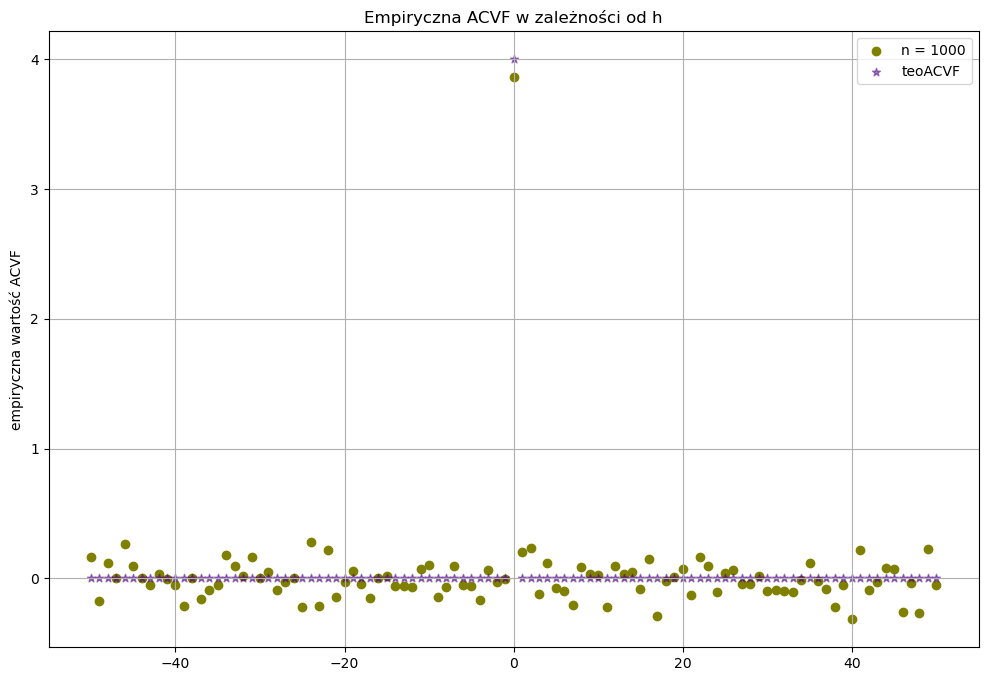

In [119]:
plt.figure(figsize=(12, 8))

for n in sorted(df['n'].unique()):
    subset = df[df['n'] == n]
    plt.scatter(subset['h'], subset['empACVF'], marker='o', label=f'n = {n}', color="olive")
plt.scatter(subset['h'], subset['teoACVF'], color = 'indigo', alpha=0.5, marker='*', label = 'teoACVF')

plt.ylabel('empiryczna wartość ACVF')
plt.title('Empiryczna ACVF w zależności od h')
plt.legend()
plt.grid()
plt.show()

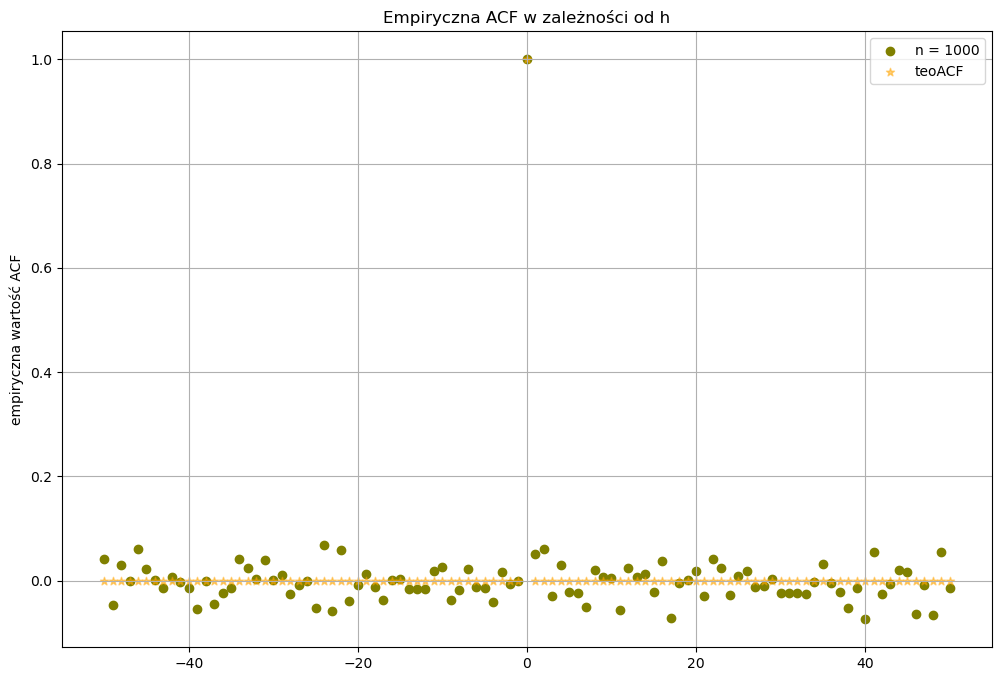

In [120]:
plt.figure(figsize=(12, 8))

for n in sorted(df['n'].unique()):
    subset = df[df['n'] == n]
    plt.scatter(subset['h'], subset['empACF'], marker='o', label=f'n = {n}', color="olive")
plt.scatter(subset['h'], subset['teoACF'], color = 'orange', alpha=0.5, marker='*', label = 'teoACF')

plt.ylabel('empiryczna wartość ACF')
plt.title('Empiryczna ACF w zależności od h')
plt.legend()
plt.grid()
plt.show()

**zadanie 4**

In [121]:
sigma = 2
theta = 0.5

In [122]:
def MA1teoACVF(h, sigma, theta):
    if h == 0:
        return sigma**2*(1+theta**2)
    if abs(h) == 1:
        return theta*sigma**2
    else:
        return 0

In [123]:
def MA1teoACF(h, theta):
    if h == 0:
        return 1
    if abs(h) == 1:
        return theta/(1+theta**2)
    else:
        return 0

In [127]:
def dane4(n, h, sigma, theta):
    Z = np.random.normal(0, sigma, size = n+1)
    X = Z[1:] + theta*Z[:-1]
    return n,h, empACVF(X,h), MA1teoACVF(h, sigma, theta),empACF(X, h) , MA1teoACF(h, theta)

In [128]:
results2 = []
for h in list(range(-50,51)):
    n = 1000
    results2.append(dane4(n,h, sigma, theta))     
df2 = pd.DataFrame(results2, columns = ['n', 'h', 'empACVF','ma1teoACVF', 'empACF', 'ma1teoACF'])
df

,n,h,empACVF,teoACVF,empACF,teoACF
0,1000,-50,0.165800,0,0.041623,0
1,1000,-49,-0.179070,0,-0.046718,0
2,1000,-48,0.118996,0,0.030036,0
3,1000,-47,-0.001075,0,-0.000261,0
4,1000,-46,0.263439,0,0.060807,0
...,...,...,...,...,...,...
96,1000,46,-0.259422,0,-0.063374,0
97,1000,47,-0.035317,0,-0.008471,0
98,1000,48,-0.269906,0,-0.065792,0
99,1000,49,0.224806,0,0.056036,0


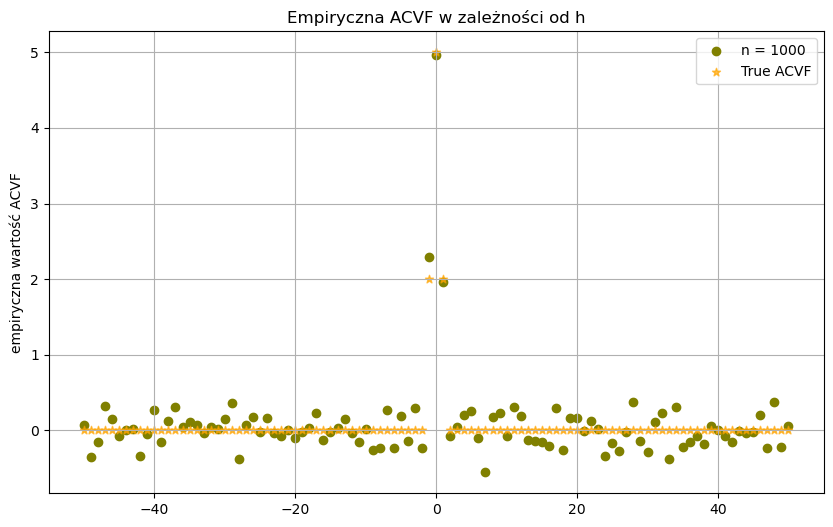

In [129]:
plt.figure(figsize=(10, 6))
for n in sorted(df2['n'].unique()):
    subset = df2[df['n'] == n]
    plt.scatter(subset['h'], subset['empACVF'], marker='o', label=f'n = {n}', color="olive")
plt.scatter(subset['h'], subset['ma1teoACVF'], color = 'orange', alpha= 0.7, marker='*', label = 'True ACVF')
plt.ylabel('empiryczna wartość ACVF')
plt.title('Empiryczna ACVF w zależności od h')
plt.legend()
plt.grid()
plt.show()

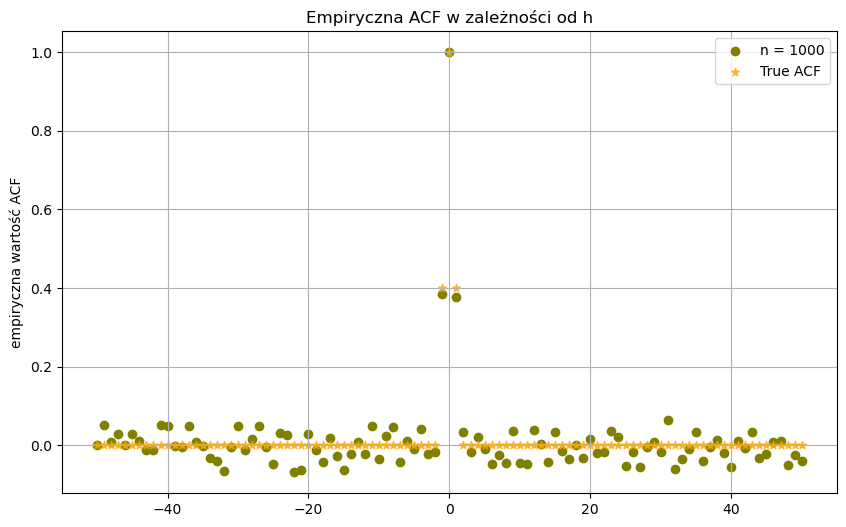

In [68]:
plt.figure(figsize=(10, 6))

for n in sorted(df2['n'].unique()):
    subset = df2[df['n'] == n]
    plt.scatter(subset['h'], subset['empACF'], marker='o', label=f'n = {n}', color="olive")
plt.scatter(subset['h'], subset['ma1teoACF'], color = 'orange', alpha= 0.7, marker='*', label = 'True ACF')
plt.ylabel('empiryczna wartość ACF')
plt.title('Empiryczna ACF w zależności od h')
plt.legend()
plt.grid()
plt.show()

**zadanie 5**

**wykres 1 (niezaszumione dane)**


In [56]:
n= 1000
theta= 0.5
mu = 0
sigma = 2

In [99]:
def empACF(X, h):
    return empACVF(X, h)/empACVF(X, 0)

def MA1teoACF(h, theta):
    if h == 0:
        return 1
    if abs(h) == 1:
        return theta/(1+theta**2)
    else:
        return 0
    
def trimmed_acvf(X, h, alpha=0.1):
    n = len(X)
    x_mean = np.mean(x)
    residuals = (X[:n - h] - x_mean) * (X[h:] - x_mean)
    trimmed = np.sort(residuals)[int(alpha * len(residuals)) : int((1 - alpha) * len(residuals))]
    return np.mean(trimmed)


#odporny estymator korelacji z przycinaniemm, ignorowanie skrajnych wartości, aby nie zakłócić wyników 
def odpornyACF(X, h, alpha=0.1):
    n = len(X)
    x_mean = np.mean(X)
    
    # Wyznaczanie reszt
    reszty = (X[:n - h] - x_mean) * (X[h:] - x_mean)
    
    # Przycinanie reszt
    trimmed = np.sort(reszty)[int(alpha * len(reszty)) : int((1 - alpha) * len(reszty))]
    
    # Obliczanie średnich po przycięciu
    trimmed_h = np.mean(trimmed)  # wartość dla opóźnienia h
    
    # Dla h = 0 (normalizacja)
    reszty_0 = (X - x_mean) ** 2
    trimmed_0 = np.sort(reszty_0)[int(alpha * len(reszty_0)) : int((1 - alpha) * len(reszty_0))]
    trimmed_0_mean = np.mean(trimmed_0)  # Trimmed wartość dla h=0
    
    return trimmed_h / trimmed_0_mean



In [100]:
def dane5(n, h, sigma, theta):
    Z = np.random.normal(0, sigma**2, size = n+1)
    X = Z[1:] + theta*Z[:-1]
    return n,h,empACF(X, h) , MA1teoACF(h, theta), odpornyACF(X,h, alpha=0.01)

In [101]:
results3 = []
lags = np.arange(11) 
for h in lags:
    n = 1000
    results3.append(dane5(n,h, sigma, theta))     
df3 = pd.DataFrame(results3, columns = ['n', 'h','empACF', 'ma1teoACF', 'odpornyACF'])

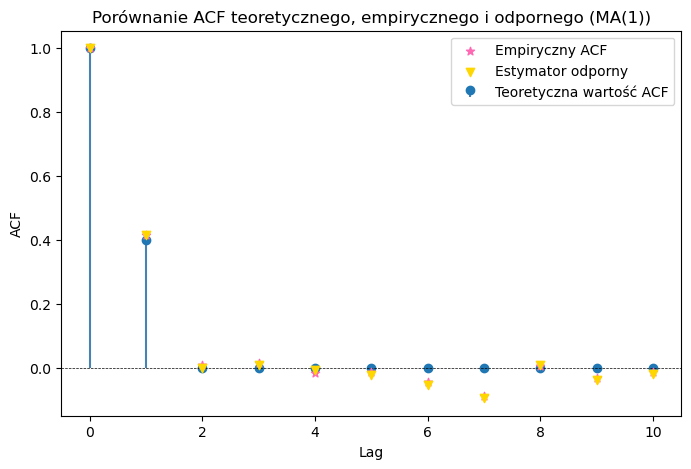

In [102]:
plt.figure(figsize=(8, 5))
plt.stem(lags, df3["ma1teoACF"], linefmt='steelblue', markerfmt='o',  basefmt='none', label='Teoretyczna wartość ACF')
plt.scatter(lags,df3["empACF"] , color='hotpink', label='Empiryczny ACF',  marker='*', zorder=5)
plt.scatter(lags,df3["odpornyACF"] , color='gold', label='Estymator odporny',  marker='v', zorder=5)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.title("Porównanie ACF teoretycznego, empirycznego i odpornego (MA(1))")
plt.legend()
plt.show()


**wykres 2 (dane z szumem)** 

In [59]:
a= 15
p= 0.01

In [104]:
def dane_zaszumione(n, sigma, theta, a, p):
    Z = np.random.normal(0, sigma, size=n+1)
    X = Z[1:] + theta * Z[:-1]
    
    random_p = np.random.uniform(0, 1, size=n)
    for i in range(n):
        if random_p[i] < p / 2:
            X[i] += a
        elif p / 2 <= random_p[i] < p:
            X[i] -= a
            
    return X

X_zaszumione = dane_zaszumione(n, sigma, theta, a, p)

lags = np.arange(11)
emp_acf = [empACF(X_zaszumione, h) for h in lags]
odp_acf = [odpornyACF(X_zaszumione, h, alpha=0.01) for h in lags]
teo_acf = [MA1teoACF(h, theta) for h in lags]

df = pd.DataFrame({
    "lag": lags,
    "emp_acf": emp_acf,
    "odp_acf": odp_acf,
    "teo_acf": teo_acf
})


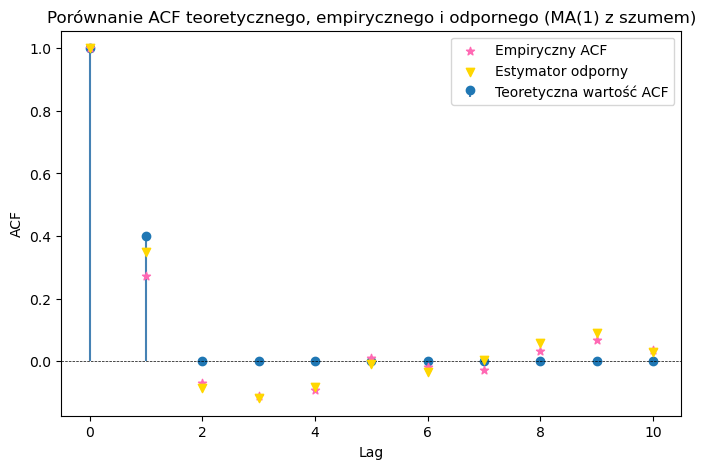

In [105]:
plt.figure(figsize=(8, 5))
plt.stem(df["lag"], df["teo_acf"], linefmt='steelblue', markerfmt='o', basefmt='none', label='Teoretyczna wartość ACF')
plt.scatter(df["lag"], df["emp_acf"], color='hotpink', label='Empiryczny ACF', marker='*', zorder=5)
plt.scatter(df["lag"], df["odp_acf"], color='gold', label='Estymator odporny', marker='v', zorder=5)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.title("Porównanie ACF teoretycznego, empirycznego i odpornego (MA(1) z szumem)")
plt.legend()
plt.show()


**wykres 3 (z szumem, samodzielnie wybrane a i p)**

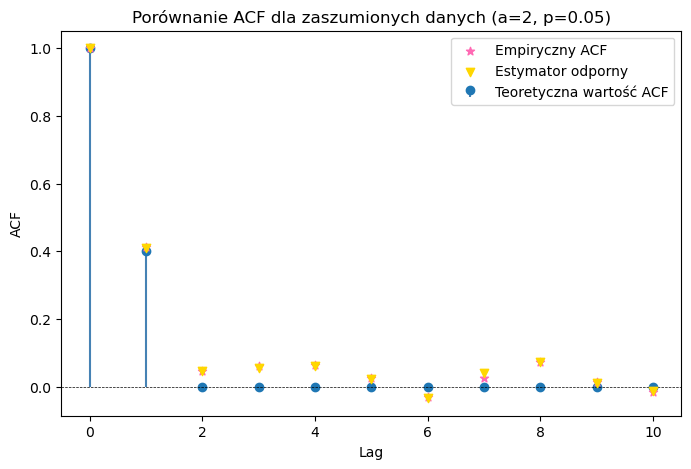

In [106]:
# Nowe wartości a i p
a_new = 2
p_new = 0.05


X_zaszumione_new = dane_zaszumione(n, sigma, theta, a_new, p_new)
emp_acf_new = [empACF(X_zaszumione_new, h) for h in lags]
robust_acf_new = [odpornyACF(X_zaszumione_new,h, alpha=0.01) for h in lags]
theoretical_acf_new = [MA1teoACF(h, theta) for h in lags]

df_new = pd.DataFrame({
    "lag": lags,
    "empirical_acf": emp_acf_new,
    "robust_acf": robust_acf_new,
    "theoretical_acf": theoretical_acf_new
})


plt.figure(figsize=(8, 5))
plt.stem(df_new["lag"], df_new["theoretical_acf"], linefmt='steelblue', markerfmt='o', basefmt='none', label='Teoretyczna wartość ACF')
plt.scatter(df_new["lag"], df_new["empirical_acf"], color='hotpink', label='Empiryczny ACF', marker='*', zorder=5)
plt.scatter(df_new["lag"], df_new["robust_acf"], color='gold', label='Estymator odporny', marker='v', zorder=5)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.title(f"Porównanie ACF dla zaszumionych danych (a={a_new}, p={p_new})")
plt.legend()
plt.show()


**Wnioski dotyczące a i p**

1. Wpływ wartości 𝑎 (amplituda szumu):
- Małe a:
    - Gdy 𝑎 jest małe, czyli szum ma niewielką amplitudę, jego wpływ na dane jest subtelny.
    - Empiryczny ACF wciąż pozostaje bliski teoretycznemu, ponieważ szum nie powoduje dużych odchyleń w wartościach danych
- Duże a:
    - Duża wartość 𝑎 (np. 𝑎=15) wprowadza duże zakłócenia w danych, co skutkuje większym odchyleniem empirycznego ACF od teoretycznego.

2. Wpływ p (prawdopodobienstwo szumu):
- małe p:
    - Gdy p jest małe szum pojawia się rzadko, więc wpływ na empiryczny ACF jest ograniczony.
- duże p: 
    - Wartość p bliska 1 (np. 𝑝=0.5) powoduje częste zakłócenia, które znacząco zmieniają charakter danych.
    - Empiryczny ACF staje się mniej wiarygodny, ponieważ zakłócenia wpływają na większość danych. W takich przypadkach estymator odporny wykazuje swoją przewagę.

**Boxploty**

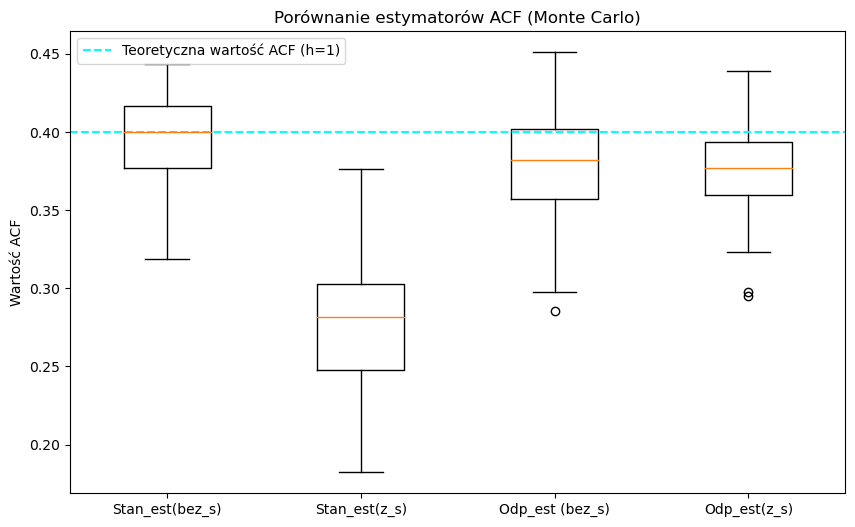

In [103]:
def monte_carlo_simulation(n, sigma, theta, a, p, MC, with_noise):
    standard_acf_list = []
    robust_acf_list = []

    for _ in range(MC):

        if with_noise:
            X = dane_zaszumione(n, sigma, theta, a, p)
        else:
            Z = np.random.normal(0, sigma, size=n+1)
            X = Z[1:] + theta * Z[:-1]

        standard_acf_list.append(empACF(X, 1))
        robust_acf_list.append(odpornyACF(X, 1, alpha=0.1))

    return standard_acf_list, robust_acf_list

n = 1000
sigma = 2
theta = 0.5
a = 15
p = 0.01
MC = 100  


standard_acf_no_noise, robust_acf_no_noise = monte_carlo_simulation(n, sigma, theta, a, p, MC, with_noise=False)
standard_acf_with_noise, robust_acf_with_noise = monte_carlo_simulation(n, sigma, theta, a, p, MC, with_noise=True)
theoretical_acf_h1 = MA1teoACF(1, theta)

plt.figure(figsize=(10, 6))
data = [
    standard_acf_no_noise,
    standard_acf_with_noise,
    robust_acf_no_noise,
    robust_acf_with_noise
]


plt.boxplot(data, labels=[
    "Stan_est(bez_s)",
    "Stan_est(z_s)",
    "Odp_est (bez_s)",
    "Odp_est(z_s)"
])


plt.axhline(theoretical_acf_h1, color='cyan', linestyle='--', label="Teoretyczna wartość ACF (h=1)")


plt.ylabel("Wartość ACF")
plt.title("Porównanie estymatorów ACF (Monte Carlo)")
plt.legend()
plt.show()
